Generate 20 random data(x,y) and initial w_0.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import random

x = []
y = []
#input data
for _ in range(20):
    #random data
    vec = np.array([1, random.gauss(0, 1), random.gauss(0, 1)])
    x.append(vec)
    y.append(random.choice([1, -1]))
w = np.array([0, 0, 0])

Run pocket algorithm with 200 iterate times **UNLESS** there exist a weight with **no mistake**.  
Then, print out **the weight** and **the amount of mistake**.

In [19]:
pocket = w
index = 0
safe = 0
#check 200 times to save the best w
for count in range(200):
    #if sign(h(x)) is not same as y:
    if np.sign(np.dot(x[index], w)) != y[index]:
        w = w + y[index] * x[index]
        pocketMis = []
        newMis = []
        # check if the new one is better
        for num in range(len(x)):
            # check the mistake of pocket w
            if np.sign(np.dot(x[num], pocket)) != y[num]:
                pocketMis.append(x[num])
            # check the mistake of new w
            if np.sign(np.dot(x[num], w)) != y[num]:
                newMis.append(x[num])
        #if new w has fewer mistakes, replace pocket by new w
        if len(newMis) < len(pocketMis):
            pocket = w
            MisNum = len(newMis)
        count += 1
        safe = 0 #mistake exist, restart
    #else keep checking
    else:
        index += 1
        safe += 1
        if index == len(x):
            index = 0
        #if there are no mistakes, then quit
        if safe == len(x):
            break
# best w = pocket
wf = pocket
print(f'the best w is {wf} with {MisNum} mistakes.')

the best w is [ 1.         -1.20386948 -1.41576428] with 5 mistakes.


Separate good data and bad data, and plot the data and the h(x) line.

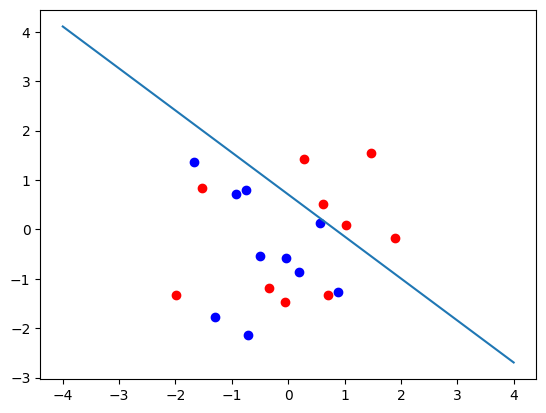

In [20]:
#plot time
fig, ax = plt.subplots()
x1p = []
x2p = []
x1n = []
x2n = []
#separate good and bad x
for num in range(len(x)):
    if y[num] > 0:
        x1p.append(x[num][1])
        x2p.append(x[num][2])
    else:
        x1n.append(x[num][1])
        x2n.append(x[num][2])
#vertical line
if w[2] == 0:
    # changed from w0 + w1*x1 = 0     
    x1_values = np.linspace((-1 * w[0] / w[1]), (-1 * w[0] / w[1]), 20)
    x2_values = np.linspace(-4, 4, 20)
#slant or horizontal line
else:
    x1_values = np.linspace(-4, 4, 20)
    # changed from w0 + w1*x1 + w2*x2 = 0 
    x2_values = (-1 * wf[1] / wf[2]) * x1_values + (-1 * wf[0] / wf[2])
#draw
ax.scatter(x1p, x2p, c='blue')
ax.scatter(x1n, x2n, c='red')
ax.plot(x1_values, x2_values)
plt.show()